In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_excel("C:\\Users\\Mayank\\Downloads\\Superstore_USA.xlsx\\Superstore_USA.xlsx", engine="openpyxl")

data.head()


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [25]:
# we will now check if there is any null value/missing data bcz we need to remove it first
data.isnull().sum() 
#so missing data on product base margin col., so we will remove it first
# since we assign mean value to all missing data so all col. appears 0 now 

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
Product_Base_Margin     0
dtype: int64

In [33]:
#assign mean value to all missing values
#changing in original copy of data
data = data.assign(Product_Base_Margin=data['Product Base Margin'].fillna(data['Product Base Margin'].mean()))


In [32]:
#data.iloc[1]   # Select the second row
data['Order Priority']

0       Not Specified
1                High
2       Not Specified
3       Not Specified
4       Not Specified
            ...      
9421         Critical
9422         Critical
9423    Not Specified
9424             High
9425    Not Specified
Name: Order Priority, Length: 9426, dtype: object

In [63]:
# total categories having no. of orders of total orders 
data['Order Priority'].value_counts()

Order Priority
high             1970
low              1926
not specified    1881
medium           1844
Critical         1805
Name: count, dtype: int64

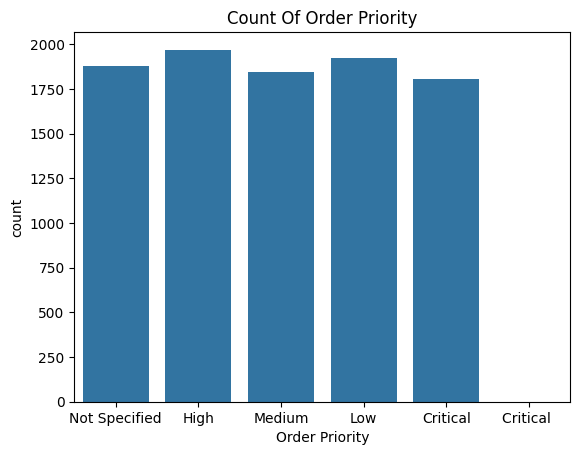

In [7]:
sb.countplot(x="Order Priority",data=data)
plt.title("Count Of Order Priority")
plt.savefig("Count Of Order Priority.jpg")
plt.show()

Sales And Profit Analysis

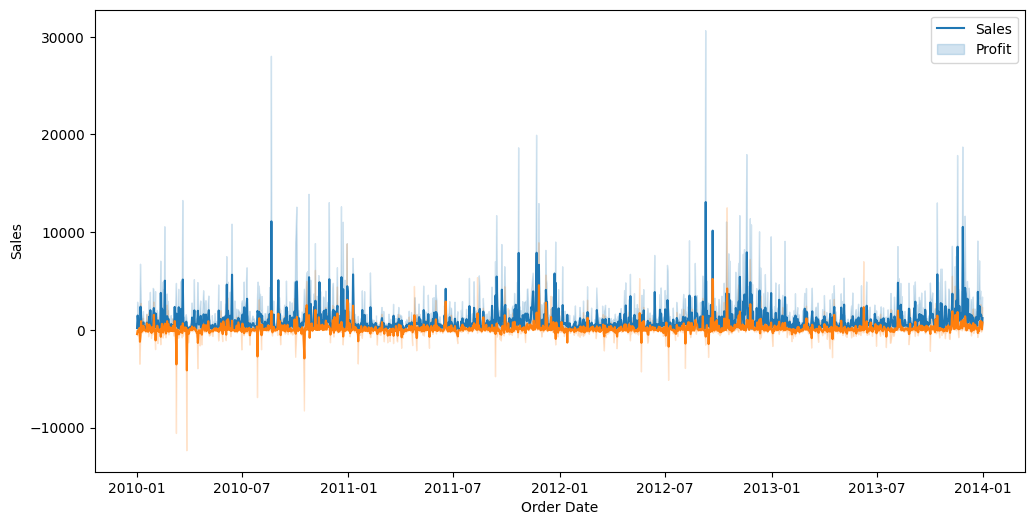

In [12]:
plt.figure(figsize=(12, 6))
sb.lineplot(x='Order Date', y='Sales', data=data)
sb.lineplot(x='Order Date', y='Profit', data=data)
plt.legend(['Sales', 'Profit'])

plt.show()


Shipping Mode

In [14]:
modes=data['Ship Mode'].value_counts()
modes

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

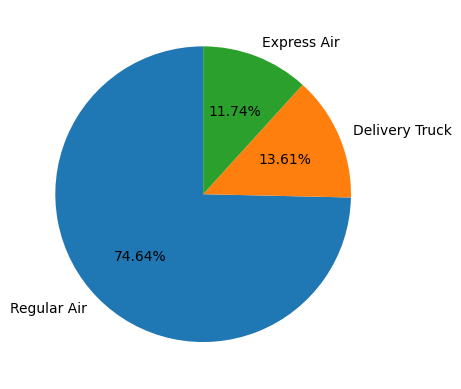

In [30]:
x=data['Ship Mode'].value_counts().index # we get regular air, express air , delivery truck
y=data['Ship Mode'].value_counts().values #there corresponding values

plt.pie(y,labels=x,autopct='%1.2f%%',startangle=90)
plt.show()


Customer Segment and Product Category

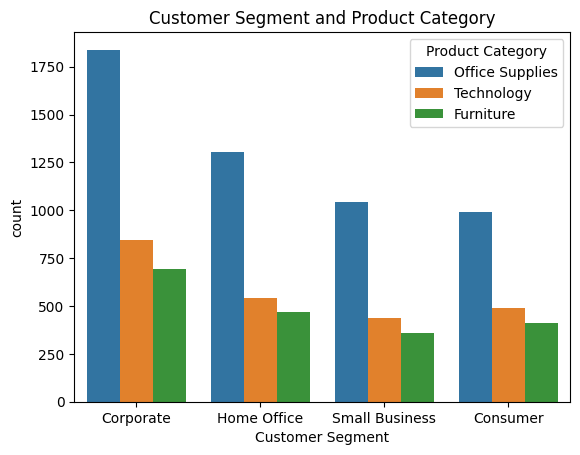

In [5]:
sb.countplot(x='Customer Segment',data=data,hue="Product Category")
plt.title("Customer Segment and Product Category")
plt.show()

Product Category

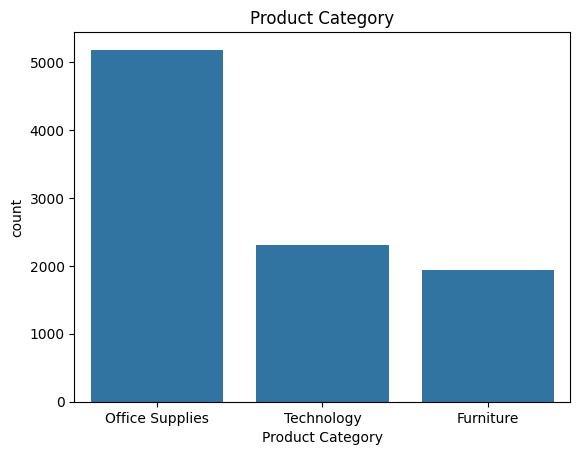

In [7]:
sb.countplot(x='Product Category',data=data)
plt.title("Product Category")
plt.show()

Product Sub-Category

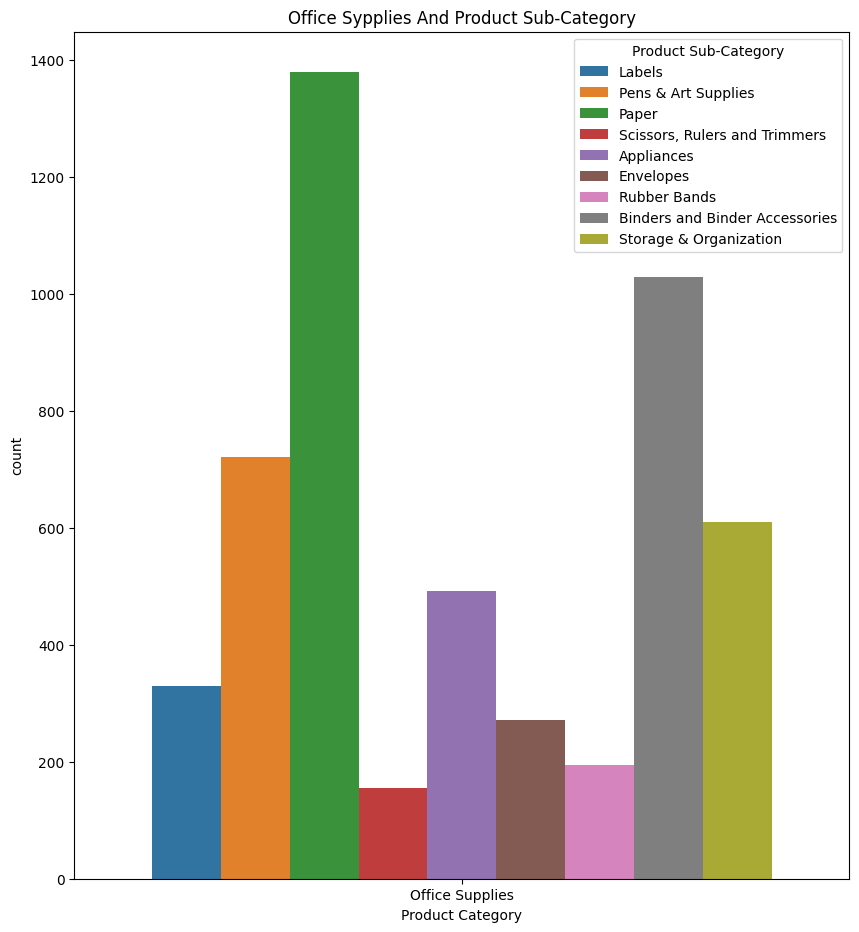

In [20]:
plt.figure(figsize=(10, 11))
sb.countplot(x='Product Category',data=data[data["Product Category"]=="Office Supplies"],hue="Product Sub-Category")
plt.title("Office Sypplies And Product Sub-Category")
plt.show()

Sales vs Year

In [43]:
# extract year from order-date col. and storing the, in new order year col.
data['Order Year'] =data['Order Date'].dt.year

data['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

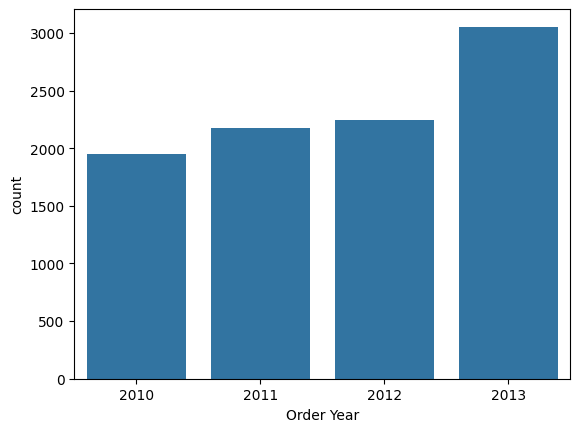

In [46]:
sb.countplot(x='Order Year',data=data)
plt.show()

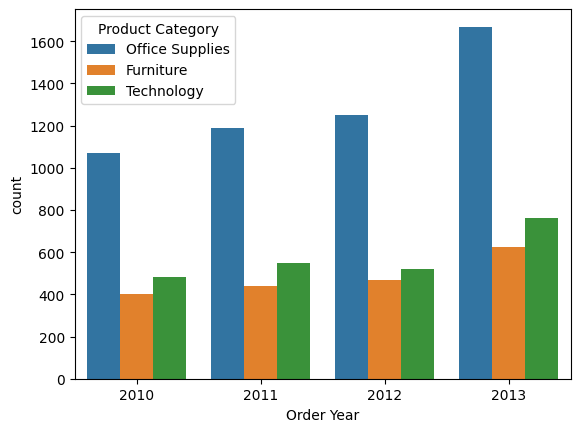

In [47]:
sb.countplot(x='Order Year',data=data,hue='Product Category')
plt.show()

Profit vs Product Category

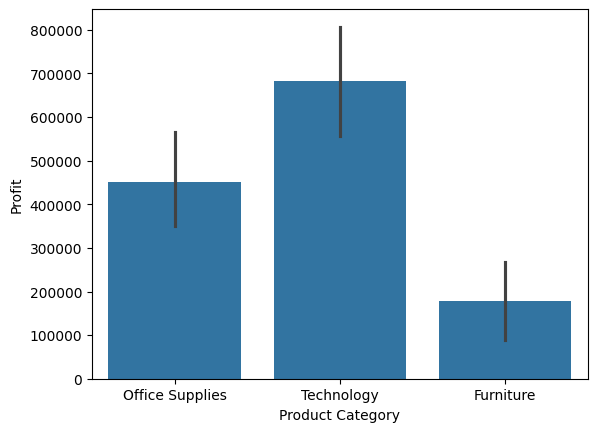

In [49]:
sb.barplot(x="Product Category",y="Profit",data=data,estimator="sum")
plt.show()

Top 5 Region Sales Wise


In [58]:
data['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

Regional Performance

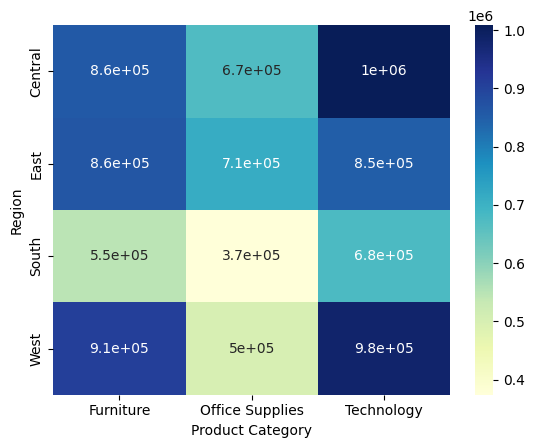

In [51]:
pivot = data.pivot_table(index='Region', columns='Product Category', values='Sales', aggfunc='sum')
sb.heatmap(pivot, cmap='YlGnBu', annot=True)
plt.show()


Pair Plot btw Sales,Profit,Discount,Quantity

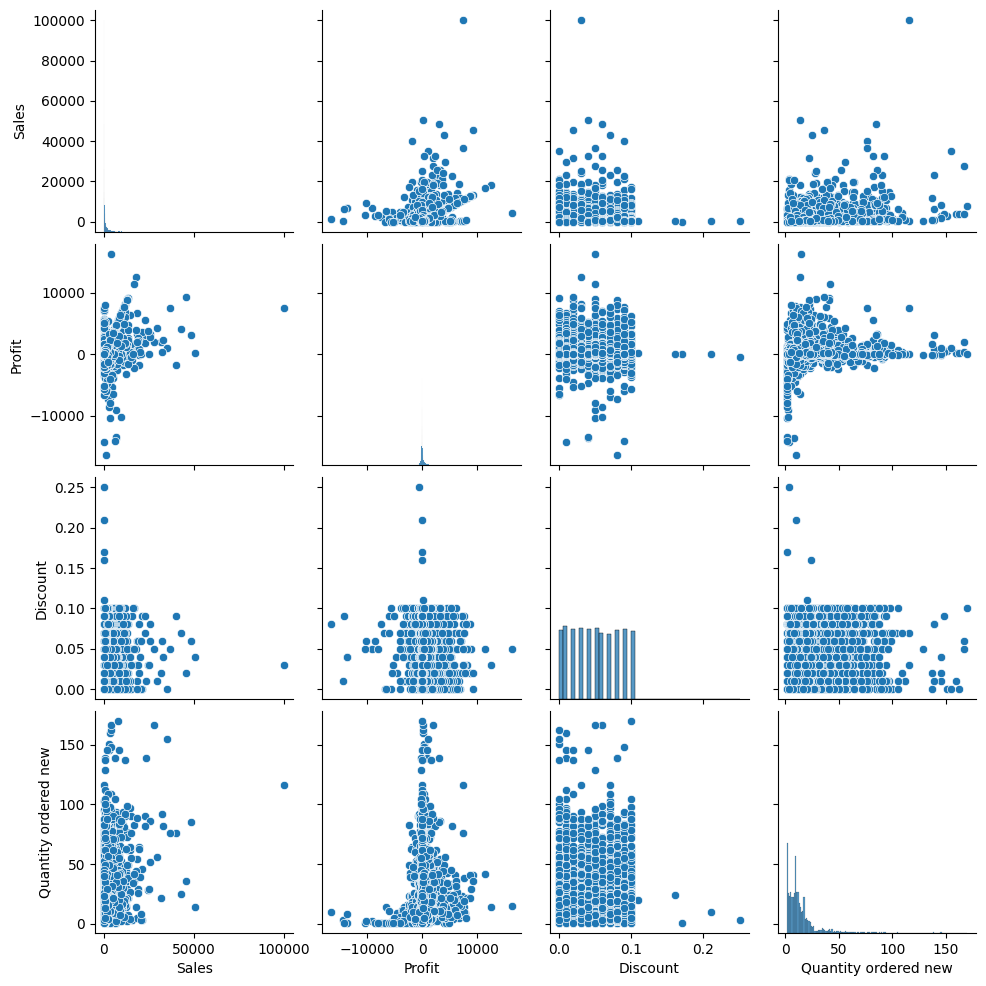

In [59]:
sb.pairplot(data[['Sales', 'Profit', 'Discount', 'Quantity ordered new']])
plt.show()

Profit Margins Across Categories

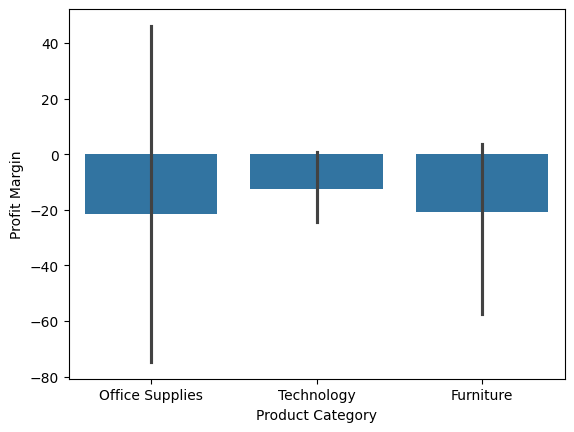

In [73]:
#creating new Profit Margin Col. 
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
sb.barplot(x='Product Category',y='Profit Margin', data=data)
plt.show()
